In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("./Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
x = pd.concat([x_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 99)

In [20]:
x_train = pd.DataFrame(x_train["Hits"])
x_test = pd.DataFrame(x_test["Hits"])

In [21]:
from sklearn.tree import DecisionTreeRegressor
cart_model = DecisionTreeRegressor().fit(x_train, y_train)

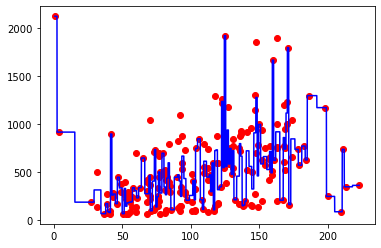

In [22]:
import matplotlib.pyplot as plt
x_grid = np.arange(min(np.array(x_train)), max(np.array(x_train)), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x_train, y_train, color = "red" )
plt.plot(x_grid, cart_model.predict(x_grid), color = "blue")

In [23]:
pred_y = cart_model.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred_y))

662.3993856466038

In [26]:
#All variables are included
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 99)
cart_model = DecisionTreeRegressor().fit(x_train, y_train)
pred_y = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, pred_y))

522.7677008284395

In [30]:
from sklearn.model_selection import GridSearchCV
params = {"max_depth": [2, 3, 4, 5, 10, 20], "min_samples_split": [2, 10, 5, 30, 50]}
cart_model = DecisionTreeRegressor()
cart_cv_model = GridSearchCV(cart_model, params, cv = 10).fit(x_train, y_train)

In [31]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 30}

In [34]:
cart_model_tuned = DecisionTreeRegressor(max_depth = cart_cv_model.best_params_["max_depth"], min_samples_split = cart_cv_model.best_params_["min_samples_split"]).fit(x_train, y_train)

In [35]:
pred_y = cart_model_tuned.predict(x_test)

In [36]:
np.sqrt(mean_squared_error(y_test, pred_y))

464.14655678987884